In [2]:
import pandas as pd

# Load the CSV file to examine its content
file_path = '1/C1Trace00000.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()


,LECROYWR6051,12904,Waveform
Segments,1,SegmentSize,100002.0
Segment,TrigTime,TimeSinceSegment1,NaN
#1,05-Jan-2002 01:12:13,0,NaN
Time,Ampl,NaN,NaN
-0.025000079,-0.118325,NaN,NaN


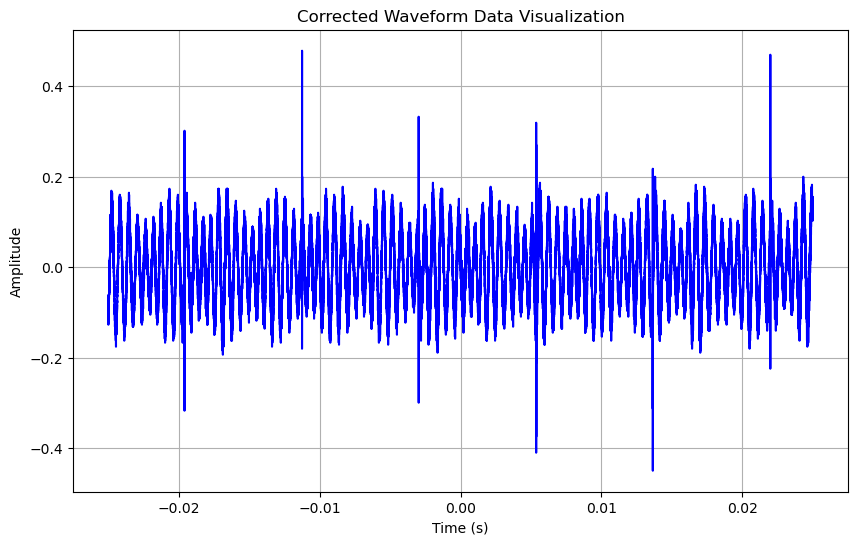

In [4]:
# Re-read the CSV, focusing on proper parsing by skipping irrelevant rows and correctly identifying columns
# Re-loading the data with manual parsing to fix issues
df_corrected = pd.read_csv(file_path, skiprows=6, header=None, names=["Time", "Amplitude"])

# Convert the data to numerical values
df_corrected['Time'] = pd.to_numeric(df_corrected['Time'], errors='coerce')
df_corrected['Amplitude'] = pd.to_numeric(df_corrected['Amplitude'], errors='coerce')

# Drop any rows with NaN values that resulted from coercion
df_corrected = df_corrected.dropna()

# Visualize the corrected waveform data
plt.figure(figsize=(10, 6))
plt.plot(df_corrected['Time'], df_corrected['Amplitude'], color='blue')
plt.title('Corrected Waveform Data Visualization')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


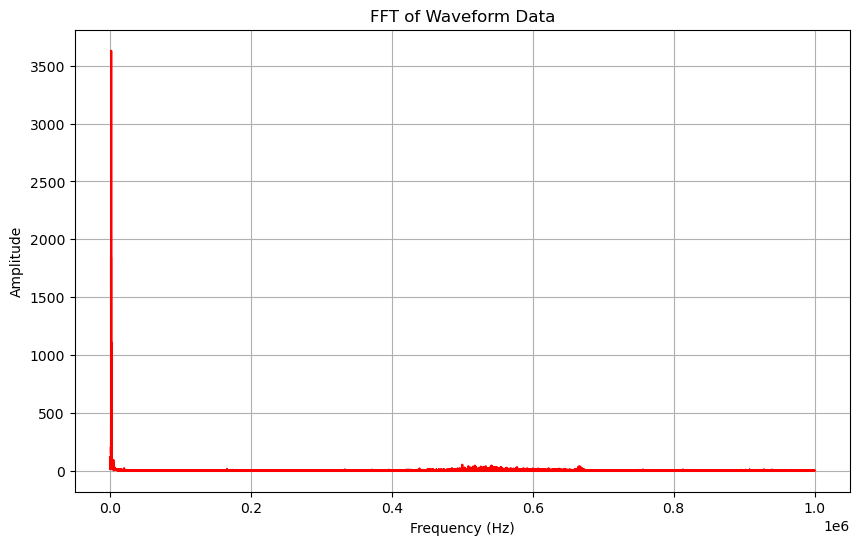

In [5]:
import numpy as np

# Perform FFT on the amplitude data
amplitude_data = df_corrected['Amplitude'].values
n = len(amplitude_data)
sampling_rate = 1 / np.mean(np.diff(df_corrected['Time'].values))  # Calculate the sampling rate based on time intervals

# FFT calculation
fft_values = np.fft.fft(amplitude_data)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Only take the positive part of the spectrum (as it is symmetric)
positive_frequencies = frequencies[:n//2]
positive_fft_values = np.abs(fft_values[:n//2])

# Plot the FFT result
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_fft_values, color='red')
plt.title('FFT of Waveform Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


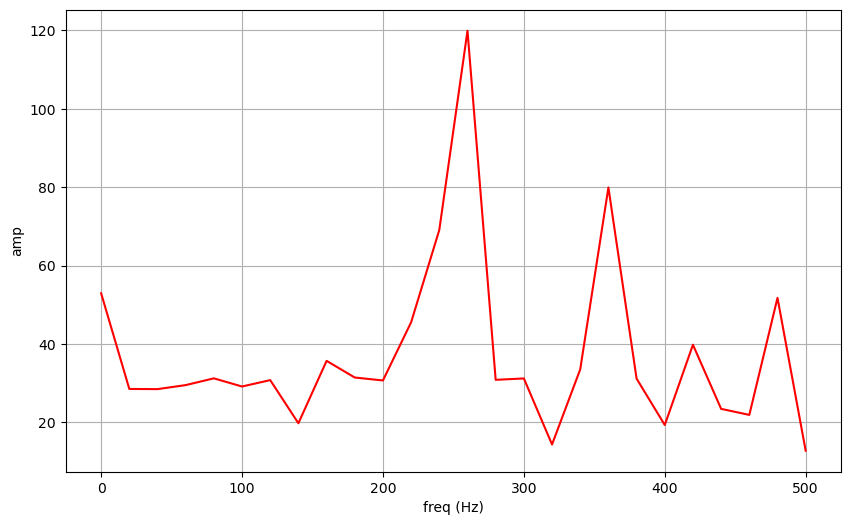

In [7]:
# 주파수 범위를 지정하여 FFT를 수행하고 플로팅하는 함수
def plot_fft_with_range_korean(df, freq_min=None, freq_max=None):
    # 진폭 데이터를 사용하여 FFT 수행
    amplitude_data = df['Amplitude'].values
    n = len(amplitude_data)
    sampling_rate = 1 / np.mean(np.diff(df['Time'].values))  # 시간 간격을 기반으로 샘플링 속도 계산

    # FFT 계산
    fft_values = np.fft.fft(amplitude_data)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

    # 스펙트럼의 양의 부분만 사용 (대칭이므로)
    positive_frequencies = frequencies[:n//2]
    positive_fft_values = np.abs(fft_values[:n//2])

    # 주파수 범위 필터 적용
    if freq_min is not None:
        positive_fft_values = positive_fft_values[positive_frequencies >= freq_min]
        positive_frequencies = positive_frequencies[positive_frequencies >= freq_min]
    if freq_max is not None:
        positive_fft_values = positive_fft_values[positive_frequencies <= freq_max]
        positive_frequencies = positive_frequencies[positive_frequencies <= freq_max]

    # 지정된 주파수 범위 내에서 FFT 결과 플로팅
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_fft_values, color='red')
    plt.xlabel('freq (Hz)')
    plt.ylabel('amp')
    plt.grid(True)
    plt.show()

# 예시: 0에서 500 Hz 사이의 주파수 범위를 사용하여 FFT 플로팅
plot_fft_with_range_korean(df_corrected, freq_min=0, freq_max=500)


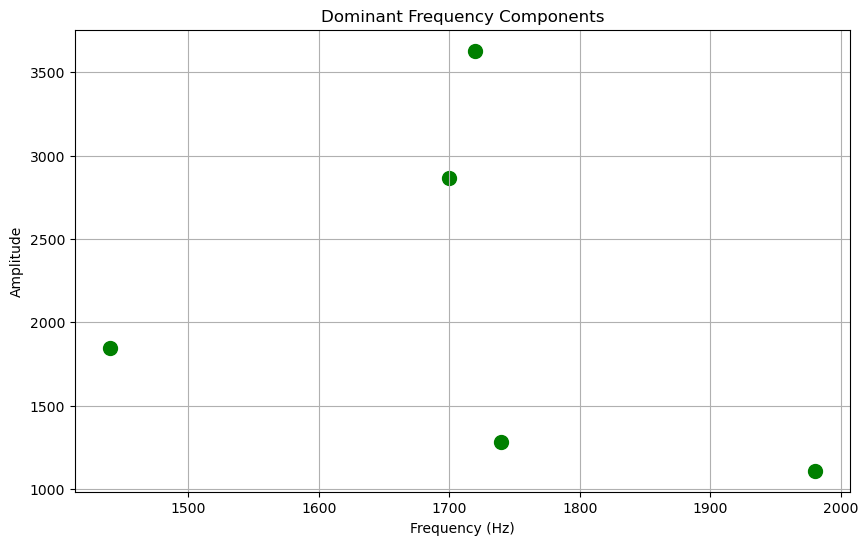

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '1/C1Trace00000.csv'
data = pd.read_csv(file_path)

# Skip irrelevant rows and extract time and voltage columns
cleaned_data = pd.read_csv(file_path, skiprows=6, header=None)
cleaned_data.columns = ['Time', 'Voltage']

# Perform FFT on the Voltage data
voltage_data = cleaned_data['Voltage'].values
time_data = cleaned_data['Time'].values

# Calculate the time step (assuming uniform time intervals)
time_step = np.mean(np.diff(time_data))

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freq = np.fft.fftfreq(len(voltage_data), d=time_step)

# Consider only the positive frequencies (real-valued signal)
positive_freqs = fft_freq[:len(fft_freq)//2]
positive_fft = np.abs(fft_result[:len(fft_result)//2])

# Identify the dominant frequency components
dominant_indices = np.argsort(positive_fft)[-5:]  # Get indices of the 5 largest components
dominant_frequencies = positive_freqs[dominant_indices]
dominant_amplitudes = positive_fft[dominant_indices]

# Sort by frequency for better readability
sorted_indices = np.argsort(dominant_frequencies)
dominant_frequencies = dominant_frequencies[sorted_indices]
dominant_amplitudes = dominant_amplitudes[sorted_indices]

# Plotting the dominant frequencies as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dominant_frequencies, dominant_amplitudes, color='green', s=100)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Dominant Frequency Components')
plt.grid(True)
plt.show()


C:\Users\jipyeong\AppData\Local\Temp\ipykernel_18516\734854150.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(csv_files))


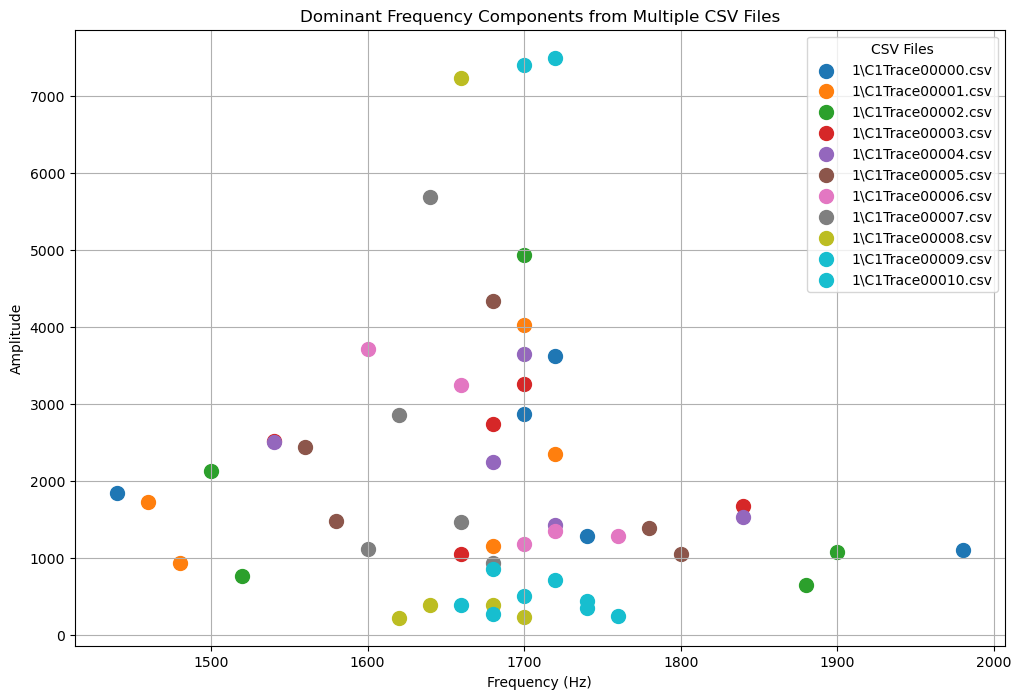

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# 모든 CSV 파일의 리스트를 가져옴
csv_files = glob.glob("1/*.csv")

# 색상을 파일별로 구분하기 위해 컬러맵 생성
colors = plt.cm.get_cmap('tab10', len(csv_files))

plt.figure(figsize=(12, 8))

# 각 CSV 파일에 대해 FFT 분석 및 플롯 수행
for idx, file in enumerate(csv_files):
    # CSV 파일 로드 및 데이터 전처리
    cleaned_data = pd.read_csv(file, skiprows=6, header=None)
    cleaned_data.columns = ['Time', 'Voltage']
    
    # FFT 수행
    voltage_data = cleaned_data['Voltage'].values
    time_data = cleaned_data['Time'].values
    time_step = np.mean(np.diff(time_data))
    
    fft_result = np.fft.fft(voltage_data)
    fft_freq = np.fft.fftfreq(len(voltage_data), d=time_step)
    
    positive_freqs = fft_freq[:len(fft_freq)//2]
    positive_fft = np.abs(fft_result[:len(fft_result)//2])
    
    # 지배적인 주파수 성분 식별
    dominant_indices = np.argsort(positive_fft)[-5:]
    dominant_frequencies = positive_freqs[dominant_indices]
    dominant_amplitudes = positive_fft[dominant_indices]
    
    # 정렬
    sorted_indices = np.argsort(dominant_frequencies)
    dominant_frequencies = dominant_frequencies[sorted_indices]
    dominant_amplitudes = dominant_amplitudes[sorted_indices]
    
    # 점 플롯 그리기
    plt.scatter(dominant_frequencies, dominant_amplitudes, color=colors(idx), s=100, label=file)

# 플롯 설정
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Dominant Frequency Components from Multiple CSV Files')
plt.grid(True)
plt.legend(title='CSV Files')
plt.show()


C:\Users\jipyeong\AppData\Local\Temp\ipykernel_18516\1497799297.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(csv_files))


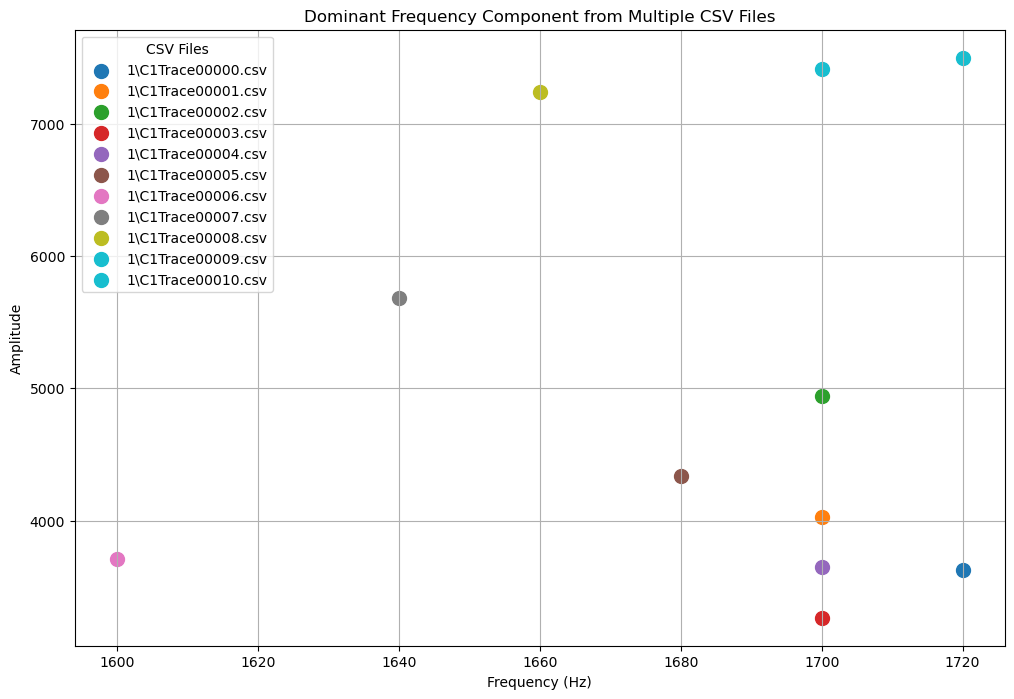

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# 모든 CSV 파일의 리스트를 가져옴
csv_files = glob.glob("1/*.csv")

# 색상을 파일별로 구분하기 위해 컬러맵 생성
colors = plt.cm.get_cmap('tab10', len(csv_files))

plt.figure(figsize=(12, 8))

# 각 CSV 파일에 대해 FFT 분석 및 최대 주파수 성분 플롯 수행
for idx, file in enumerate(csv_files):
    # CSV 파일 로드 및 데이터 전처리
    cleaned_data = pd.read_csv(file, skiprows=6, header=None)
    cleaned_data.columns = ['Time', 'Voltage']
    
    # FFT 수행
    voltage_data = cleaned_data['Voltage'].values
    time_data = cleaned_data['Time'].values
    time_step = np.mean(np.diff(time_data))
    
    fft_result = np.fft.fft(voltage_data)
    fft_freq = np.fft.fftfreq(len(voltage_data), d=time_step)
    
    positive_freqs = fft_freq[:len(fft_freq)//2]
    positive_fft = np.abs(fft_result[:len(fft_result)//2])
    
    # 지배적인 주파수 성분 중 최대값 찾기
    max_index = np.argmax(positive_fft)
    dominant_frequency = positive_freqs[max_index]
    dominant_amplitude = positive_fft[max_index]
    
    # 점 플롯 그리기
    plt.scatter(dominant_frequency, dominant_amplitude, color=colors(idx), s=100, label=file)

# 플롯 설정
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Dominant Frequency Component from Multiple CSV Files')
plt.grid(True)
plt.legend(title='CSV Files')
plt.show()


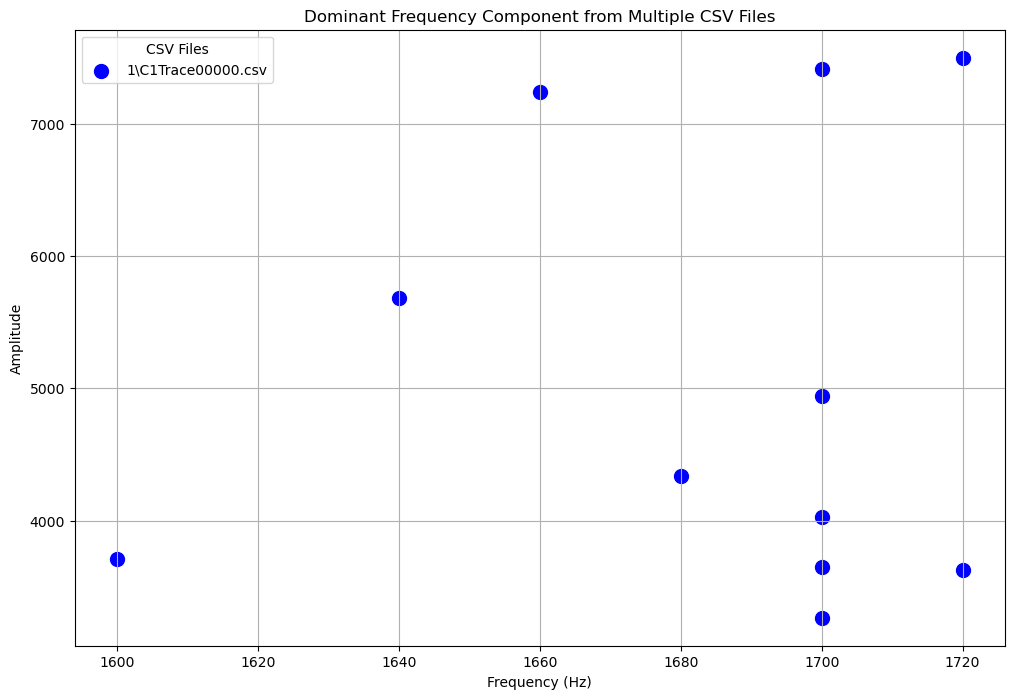

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# 모든 CSV 파일의 리스트를 가져옴
csv_files = glob.glob("1/*.csv")

plt.figure(figsize=(12, 8))

# 각 CSV 파일에 대해 FFT 분석 및 최대 주파수 성분 플롯 수행
for idx, file in enumerate(csv_files):
    # CSV 파일 로드 및 데이터 전처리
    cleaned_data = pd.read_csv(file, skiprows=6, header=None)
    cleaned_data.columns = ['Time', 'Voltage']
    
    # FFT 수행
    voltage_data = cleaned_data['Voltage'].values
    time_data = cleaned_data['Time'].values
    time_step = np.mean(np.diff(time_data))
    
    fft_result = np.fft.fft(voltage_data)
    fft_freq = np.fft.fftfreq(len(voltage_data), d=time_step)
    
    positive_freqs = fft_freq[:len(fft_freq)//2]
    positive_fft = np.abs(fft_result[:len(fft_result)//2])
    
    # 지배적인 주파수 성분 중 최대값 찾기
    max_index = np.argmax(positive_fft)
    dominant_frequency = positive_freqs[max_index]
    dominant_amplitude = positive_fft[max_index]
    
    # 동일한 색상으로 점 플롯 그리기
    plt.scatter(dominant_frequency, dominant_amplitude, color='blue', s=100, label=file if idx == 0 else "")

# 플롯 설정
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Dominant Frequency Component from Multiple CSV Files')
plt.grid(True)
plt.legend(title='CSV Files')
plt.show()


C:\Users\jipyeong\AppData\Local\Temp\ipykernel_18516\3640117096.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(directories))


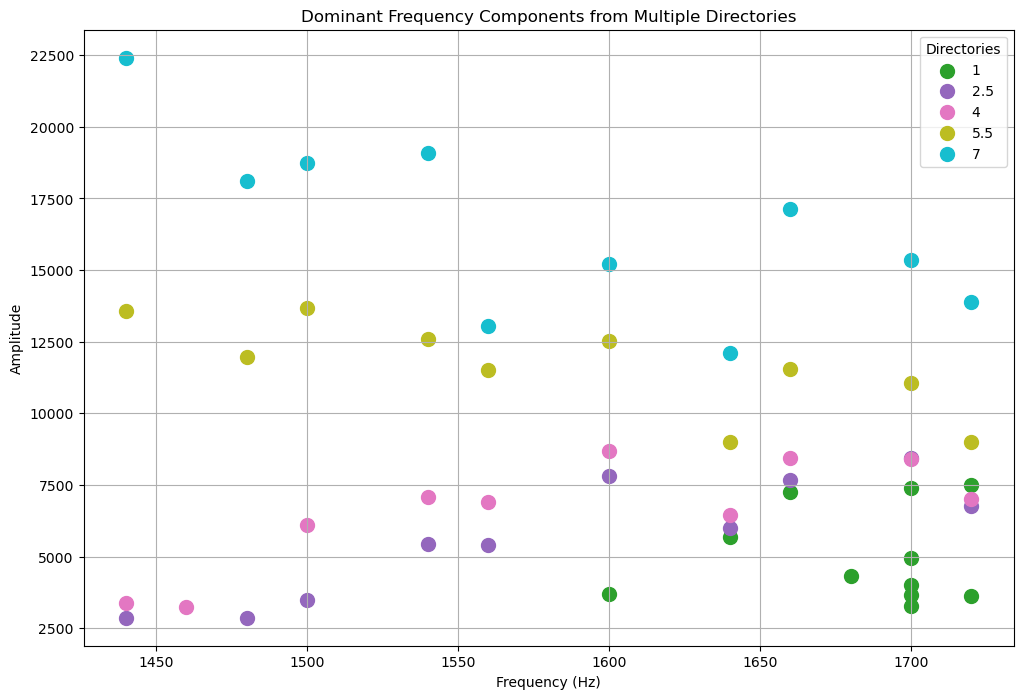

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# 현재 디렉토리 내의 모든 하위 디렉토리를 탐색
directories = [d for d in os.listdir() if os.path.isdir(d)]

# 색상을 디렉토리별로 구분하기 위해 컬러맵 생성
colors = plt.cm.get_cmap('tab10', len(directories))

plt.figure(figsize=(12, 8))

# 각 디렉토리에 대해 작업 수행
for dir_idx, directory in enumerate(directories):
    csv_files = glob.glob(os.path.join(directory, "*.csv"))
    
    # 각 디렉토리의 CSV 파일에 대해 FFT 분석 및 최대 주파수 성분 플롯 수행
    for file in csv_files:
        # CSV 파일 로드 및 데이터 전처리
        cleaned_data = pd.read_csv(file, skiprows=6, header=None)
        cleaned_data.columns = ['Time', 'Voltage']
        
        # FFT 수행
        voltage_data = cleaned_data['Voltage'].values
        time_data = cleaned_data['Time'].values
        time_step = np.mean(np.diff(time_data))
        
        fft_result = np.fft.fft(voltage_data)
        fft_freq = np.fft.fftfreq(len(voltage_data), d=time_step)
        
        positive_freqs = fft_freq[:len(fft_freq)//2]
        positive_fft = np.abs(fft_result[:len(fft_result)//2])
        
        # 지배적인 주파수 성분 중 최대값 찾기
        max_index = np.argmax(positive_fft)
        dominant_frequency = positive_freqs[max_index]
        dominant_amplitude = positive_fft[max_index]
        
        # 디렉토리별로 색상을 다르게 하여 점 플롯 그리기
        plt.scatter(dominant_frequency, dominant_amplitude, color=colors(dir_idx), s=100, label=directory if file == csv_files[0] else "")

# 플롯 설정
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Dominant Frequency Components from Multiple Directories')
plt.grid(True)
plt.legend(title='Directories')
plt.show()
